In [35]:
from lorenz_gan.submodels import AR1RandomUpdater
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt

In [60]:
ar1_old = pickle.load(open("../exp_travis/ar1_random_updater.pkl", "rb"))
ar1_new = pickle.load(open("../exp_travis/ar1_random_updater_res.pkl", "rb"))
ar1_set = AR1RandomUpdater(corr=0.985, noise_sd=np.sqrt(1-0.985**2))

In [56]:
ar1_new.corr

0.994216880007226

In [61]:
random_values = np.zeros((100000, 3))
for i in range(random_values.shape[0]):
    random_values[i, 0] = ar1_old.update(random_values[i-1, 0])
    random_values[i, 1] = ar1_new.update(random_values[i-1, 1])
    random_values[i, 2] = ar1_set.update(random_values[i-1, 2])
rvd = pd.DataFrame(random_values)

In [62]:
lags = np.arange(1, 1001)
corr_values = np.zeros((3, 1000))
for i in range(3):
    for j in range(1000):
        corr_values[i, j] = rvd.loc[:, i].autocorr(lags[j])

Text(0,0.5,'Autocorrelation')

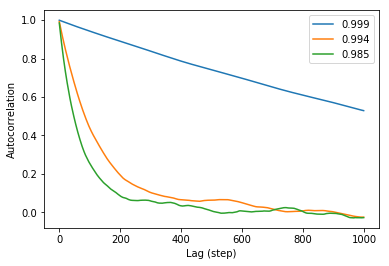

In [64]:
corr_lines = plt.plot(corr_values.T)
plt.legend(corr_lines, ["0.999", "0.994", "0.985"])
plt.xlabel("Lag (step)")
plt.ylabel("Autocorrelation")
#plt.gca().set_yscale("log")

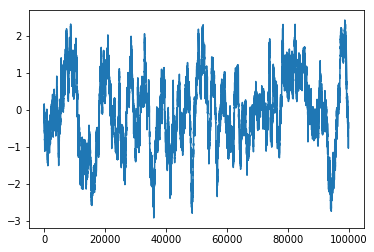

In [33]:
plt.plot(random_values[:, 0])
#plt.plot(random_values[:, 1])
#plt.plot(random_values[:, 2])

([array([0.0000e+00, 4.9000e+01, 3.8430e+03, 1.2355e+04, 3.0456e+04,
         3.0026e+04, 1.8392e+04, 4.8760e+03, 3.0000e+00, 0.0000e+00]),
  array([1.0000e+00, 1.7600e+02, 2.3640e+03, 1.2748e+04, 2.9779e+04,
         3.1807e+04, 1.7725e+04, 4.9090e+03, 4.9100e+02, 0.0000e+00]),
  array([1.5000e+01, 3.1300e+02, 2.8030e+03, 1.2434e+04, 2.8390e+04,
         3.2095e+04, 1.7964e+04, 5.1210e+03, 7.8800e+02, 7.7000e+01])],
 array([-4.43805082, -3.58192046, -2.7257901 , -1.86965973, -1.01352937,
        -0.15739901,  0.69873135,  1.55486172,  2.41099208,  3.26712244,
         4.12325281]),
 <a list of 3 Lists of Patches objects>)

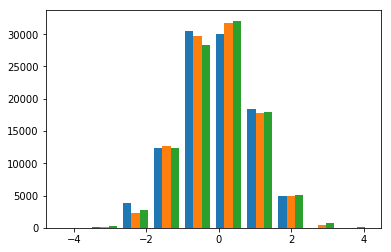

In [30]:
plt.hist(random_values)

In [31]:
random_values.std(axis=0)

array([0.98265237, 0.96609969, 1.00174418])